# Lab Activity 4.1. Understanding Optimization

**Learning Outcomes**
1. Understand how an optimizer seeks to minimize a loss function by following a direction opposite to its gradient in 1d and 2d cases.
2. Form intuition on the optimization process for 1d and 2d attributes dataset in order to help understand the same concepts for $M$ dimension space.

In this activity you will look at minimizing the sum of squared errors SSE of a set of clusters. We start off with examples that minimize 1d and 2d functions. Then we look into minimizing SSE for datasets of one cluster (entire dataset), two clusters both with 1 attribute. Then we move to datasets with 2 attributes. We also look at clusters with different shapes.

## Minimizing a Simple Function in 1D

In [1]:
%matplotlib inline
from IPython.display import display, HTML
display(HTML('<style>.container {width: 85% !important}</style>'))

In [2]:
import matplotlib.pyplot as plt
import numpy as np

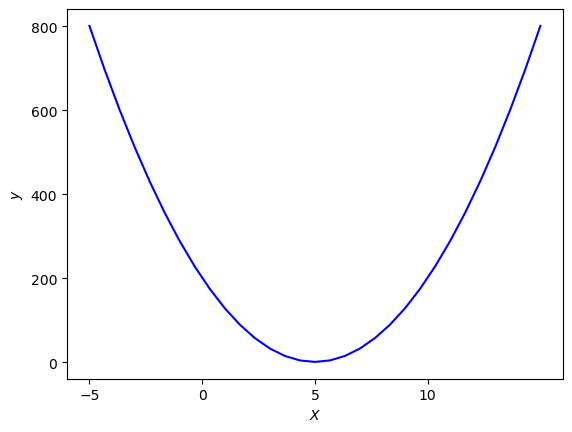

In [3]:
a = 5 #  change this to any value you like 
x = np.linspace(a-10, a+10,31) # number of points must be odd otherwise the samples on x will miss the minimum
w0 = 1 # change this to any value you like 
w1 = 8 # change this to any value you like 

y  = w0 + w1*(x-a)**2

# non essential stuff to make the plot aesthetically better
plt.xlabel('$X$')
plt.ylabel('$y$')

plt.xticks(np.arange(x.min(), x.max(), step=5))
plt.yticks(np.arange(y.min()-1, y.max(), step=200))

plt.plot(x, y, '-b')
#plt.grid()

Try different values of a to see that a is always the minimiser for this function

In [4]:
x[np.argmin(y)]==a

True

## Minimizing a Surface Function in 2D

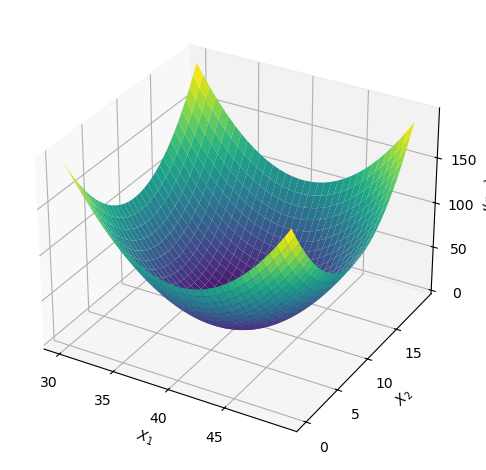

In [5]:
import matplotlib.pyplot as plt
import numpy as np

m = [40, 10]  # This is a centroid in 2D space
a = m[0]      # 40  # Change this to any value
b = m[1]      # 10  # Change this to any value

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Correct way to add a 3D axis
step = 0.3  # Try 3 instead to see the effect
x = np.arange(a - 10, a + 10, step)
y = np.arange(b - 10, b + 10, step)
X, Y = np.meshgrid(x, y)

Z = (X - a)**2 + (Y - b)**2  # SSE sum of squared distances

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xticks(np.arange(x.min(), x.max(), step=5))
ax.set_yticks(np.arange(y.min(), y.max(), step=5))
ax.set_zticks(np.arange(Z.min(), Z.max(), step=50))
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('$J(m_1)$')
plt.tight_layout()
plt.savefig('2dobjectiveMinimisation.png')
plt.show()

In [6]:
eps = 0.01
ind = round(np.argmin(Z)/(len(x)+1))
#print(len(x),ind)
#X[ind,ind]==a and Y[ind,ind]==b
x[ind]-a < eps and y[ind]- b <eps


True

## Minimizing the SSE Function for a Cluster

### One cluster case

In the following code 

1. we create a simple one cluster dataset and then 
2. we calculate its SSE with respect to several centroids. 
3. we then show that the minimal value of the SSE corresponds with the mean of the cluster set.

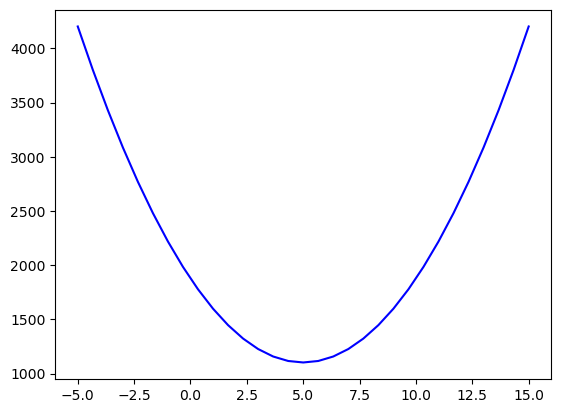

In [7]:
n = 31 # number of points must be odd otherwise the samples on x will miss the minimum
a = 5  # this is center of the dataset, you can change this to any value you like 

x = np.linspace(a-10, a+10, n)          # this is our simple dataset
mu= x.mean()

# m are the search space for the centroid, it can take any value in the dataset range
# we will prove that the best value is the mean of the dataset
m   = np.linspace(x.min(), x.max(), n)  
SSE = np.zeros(m.shape)

for i, mi in enumerate(m):
    SSE[i] = ((x-mi)**2).sum()

plt.plot(x, SSE, '-b')
#plt.grid()

Try different values of 'a' to see that 'a' is always the minimiser for this function

Now, we want to obtain the m value that makes SSE minimal

In [20]:
print(SSE.min())
print(SSE.argmin())
print(m[SSE.argmin()])

1102.2222222222222
15
5.0


Now the moment of truth. Our $m$ value that minimizes the SSE must correspond with the mean of the dataset

In [22]:

x.mean() == m[SSE.argmin()]


True

### Two cluster case with uniformed distribution

In the following code 

1. we create a simple two clusters dataset and then 
2. we calculate the SSE for each cluster with respect to several centroids
3. we then show that the minimal value of the SSEs corresponds with the mean of each cluster set

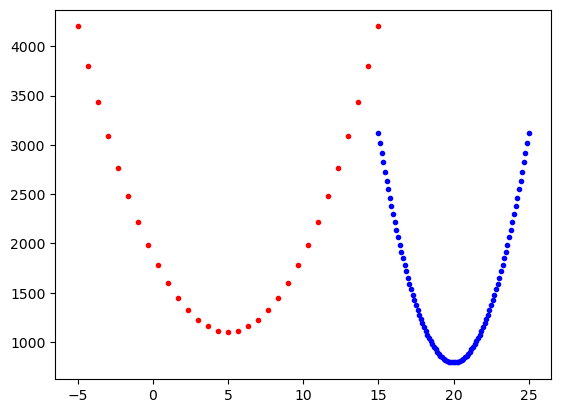

In [21]:
n = 31 # number of points must be odd otherwise the samples on x will miss the minimum
a = 5  # this is center of the dataset, you can change this to any value you like 

cluster1 = np.linspace(a-10, a+10, n)          # first  cluster uniformally distributed
cluster2 = np.linspace(a+10, a+20, n*3)        # second cluster uniformally distributed and has more data points

# m1 and m2 are the search spaces for the centroids in cluster 1 and 2, it can take any value in the cluster range
# the bigger the search space the more likely we will land on a vlaue close to the mean
# we will prove that the best value is the mean of the dataset
m1   = np.linspace(cluster1.min(), cluster1.max(), n)  
m2   = np.linspace(cluster2.min(), cluster2.max(), n*3)  

SSE1= np.zeros(m1.shape)
SSE2= np.zeros(m2.shape)

for i, mi in enumerate(m1):
    SSE1[i] = ((cluster1-mi)**2).sum()

for i, mi in enumerate(m2):
    SSE2[i] = ((cluster2-mi)**2).sum()

plt.plot(m1, SSE1, '.r')
plt.plot(m2, SSE2, '.b')
#plt.grid()


In [11]:
print('----Cluster 1---------')
print(SSE1.min())
print(SSE1.argmin())
print(m1[SSE1.argmin()])
print(cluster1.mean())

print('----Cluster 2---------')
print(SSE2.min())
print(SSE2.argmin())
print(m2[SSE2.argmin()])
print(cluster2.mean())

----Cluster 1---------
1102.2222222222222
15
5.0
5.0
----Cluster 2---------
791.8478260869565
46
20.0
20.0


In [12]:
cluster1.mean() == m1[SSE1.argmin()] and cluster2.mean() == m2[SSE2.argmin()]

True

### Two Clusters case with a normal distribution

This time we need to be careful in terms of exact equality as the centroids search space is uniformed while the input space is normally distributed. So the centroids will be close to the mean but not exactly the same. 

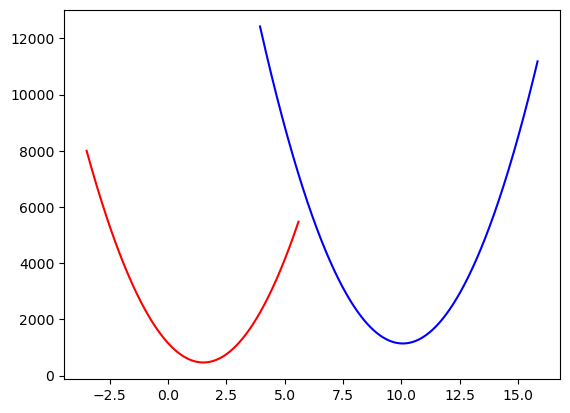

In [13]:
n = 301 # number of points must be odd otherwise the samples on x will miss the minimum
a = 5  # this is centre of the dataset, you can change this to any value you like 

mu1, sigma1 = 1.5, 1.2
mu2, sigma2 =  10, 2.0
cluster1  = np.random.normal(mu1,sigma1,n)
cluster2  = np.random.normal(mu2,sigma2,n)

# m1 and m2 are the search spaces for the centroids in cluster 1 and 2, it can take any value in the cluster range
# the bigger the search space the more likely we will land on a value close to the mean
# we will prove that the best value is the mean of the dataset
m1   = np.linspace(cluster1.min(), cluster1.max(), n*10)  
m2   = np.linspace(cluster2.min(), cluster2.max(), n*10)  

SSE1= np.zeros(m1.shape)
SSE2= np.zeros(m2.shape)

for i, mi in enumerate(m1):
    SSE1[i] = ((cluster1-mi)**2).sum()

for i, mi in enumerate(m2):
    SSE2[i] = ((cluster2-mi)**2).sum()

plt.plot(m1, SSE1, '-r')
plt.plot(m2, SSE2, '-b')
#plt.grid()

In [14]:
print('----Cluster 1---------')
print(SSE1.min())
print(SSE1.argmin())
print(m1[SSE1.argmin()])
print(cluster1.mean())

print('----Cluster 2---------')
print(SSE2.min())
print(SSE2.argmin())
print(m2[SSE2.argmin()])
print(cluster2.mean())

----Cluster 1---------
465.03428858042184
1657
1.5157465124270466
1.5170897642647156
----Cluster 2---------
1141.192547949849
1548
10.069014035706184
10.070412778680012


In [15]:
eps = 0.005
cluster1.mean() - m1[SSE1.argmin()]< eps and cluster2.mean()-  m2[SSE2.argmin()] < eps

True

### Two clusters with two attributes

In the previous cases, we were dealing with one attribute $x$ for each cluster.

This time we will deal with two cluster and our datasets have two attributes $x1$ and $x2$.

C:\Users\dylan\AppData\Local\Temp\ipykernel_8608\1109961890.py:15: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  cluster1 = np.random.multivariate_normal(mu1, cov1, n).T


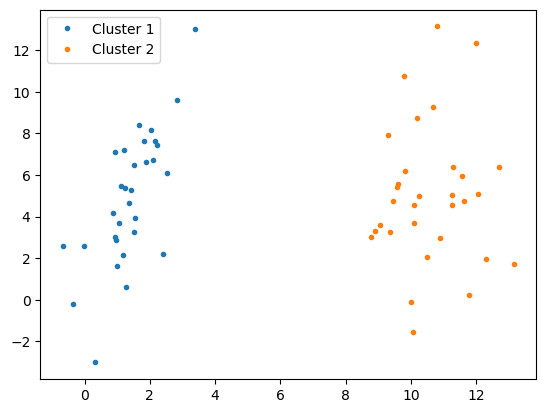

In [16]:
# Number of points must be odd, otherwise the samples on x will miss the minimum
n = 31  

# This is the center of the dataset; you can change this to any value you like
a = 5  

# Mean and covariance for cluster 1
mu1, cov1 = [1.5, 5], [[1, 3], [2, 10]]  # Strong correlation between x and y axes

# Mean and covariance for cluster 2
mu2, cov2 = [10.5, 5], [[1, 0], [0, 10]]  # No correlation between x and y axes

# Generate data for cluster 1 using a multivariate normal distribution
# `T` transposes the array to make each row a feature and each column a data point
cluster1 = np.random.multivariate_normal(mu1, cov1, n).T  

# Generate data for cluster 2 in the same way
cluster2 = np.random.multivariate_normal(mu2, cov2, n).T  

# Plot cluster 1 points
plt.plot(cluster1[0], cluster1[1], '.', label="Cluster 1")  

# Plot cluster 2 points
plt.plot(cluster2[0], cluster2[1], '.', label="Cluster 2")  
plt.legend()

# Define the search spaces for the centroids of cluster 1 and 2
# These spaces span the range of the data points in each cluster
# The larger the search space, the more likely the value will converge to the mean
m10 = np.linspace(cluster1[0].min(), cluster1[0].max(), n * 10)  # X-coordinates for cluster 1
m11 = np.linspace(cluster1[1].min(), cluster1[1].max(), n * 10)  # Y-coordinates for cluster 1

m20 = np.linspace(cluster2[0].min(), cluster2[0].max(), n * 10)  # X-coordinates for cluster 2
m21 = np.linspace(cluster2[1].min(), cluster2[1].max(), n * 10)  # Y-coordinates for cluster 2

# Initialize SSE (Sum of Squared Errors) matrices for cluster 1 and cluster 2
SSE1 = np.zeros((len(m10), len(m11)))  # SSE for cluster 1
SSE2 = np.zeros((len(m20), len(m21)))  # SSE for cluster 2

# Calculate SSE for all centroid combinations in cluster 1
for i, mi in enumerate(m10):  # Iterate over all x-coordinates in the search space
    for j, mj in enumerate(m11):  # Iterate over all y-coordinates in the search space
        m1 = np.c_[mi, mj].T  # Centroid candidate for cluster 1
        # Calculate the SSE by summing squared distances between the centroid and all cluster points
        SSE1[i, j] = ((mi - cluster1[0])**2 + (mj - cluster1[1])**2).sum()

# Calculate SSE for all centroid combinations in cluster 2
for i, mi in enumerate(m20):  # Iterate over all x-coordinates in the search space
    for j, mj in enumerate(m21):  # Iterate over all y-coordinates in the search space
        m2 = np.c_[mi, mj].T  # Centroid candidate for cluster 2
        # Calculate the SSE by summing squared distances between the centroid and all cluster points
        SSE2[i, j] = ((mi - cluster2[0])**2 + (mj - cluster2[1])**2).sum()

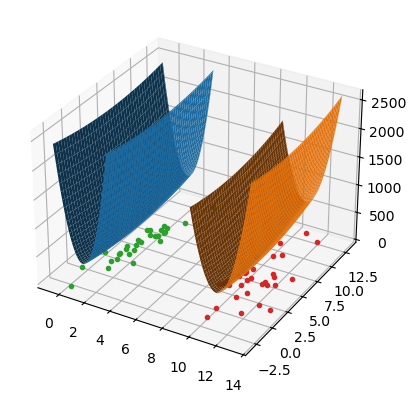

In [17]:
# Generate a meshgrid for cluster 1 centroids (m10 and m11)
m_10, m_11 = np.meshgrid(m10, m11)  # Creates a grid of values for centroids in 2D space for cluster 1

# Generate a meshgrid for cluster 2 centroids (m20 and m21)
m_20, m_21 = np.meshgrid(m20, m21)  # Creates a grid of values for centroids in 2D space for cluster 2

# Uncomment the following line if using Jupyter Notebook and want an interactive 3D plot
# %matplotlib notebook 

# Create a 3D plot
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})  # Initialize a 3D subplot for plotting surfaces

# Plot the SSE surface for cluster 1
surf = ax.plot_surface(m_10, m_11, SSE1)  # Plots the SSE surface for cluster 1 over its centroids

# Plot the SSE surface for cluster 2
surf = ax.plot_surface(m_20, m_21, SSE2)  # Plots the SSE surface for cluster 2 over its centroids

# Plot the data points for cluster 1
plt.plot(cluster1[0], cluster1[1], '.', label='Cluster 1 Points')  # Adds the actual data points for cluster 1

# Plot the data points for cluster 2
plt.plot(cluster2[0], cluster2[1], '.', label='Cluster 2 Points')  # Adds the actual data points for cluster 2

In [18]:
# Displaying details for Cluster 1
print('----Cluster 1---------')

# Uncommented line below calculates and displays the minimum SSE values for both dimensions of Cluster 1
# print(SSE1[0].min(), SSE1[1].min())

# Find the indices (i, j) corresponding to the minimum SSE values for Cluster 1
i, j = SSE1[0].argmin(), SSE1[1].argmin()

# Retrieve the coordinates of the centroid (minimizing SSE) for Cluster 1 using the indices
minSSE1 = np.c_[m_10[i, j], m_11[i, j]]

# Print the optimal centroid (minimizing SSE) for Cluster 1
print(minSSE1)

# Print the mean of Cluster 1 data along axis 1 for comparison with the calculated centroid
print(cluster1.mean(1))


# Displaying details for Cluster 2
print('----Cluster 2---------')

# Uncommented line below calculates and displays the minimum SSE values for both dimensions of Cluster 2
# print(SSE2[0].min(), SSE2[1].min())

# Find the indices (i, j) corresponding to the minimum SSE values for Cluster 2
i, j = SSE2[0].argmin(), SSE2[1].argmin()

# Retrieve the coordinates of the centroid (minimizing SSE) for Cluster 2 using the indices
minSSE2 = np.c_[m_20[i, j], m_21[i, j]]

# Print the optimal centroid (minimizing SSE) for Cluster 2
print(minSSE2)

# Print the mean of Cluster 2 data along axis 1 for comparison with the calculated centroid
print(cluster2.mean(1))

----Cluster 1---------
[[1.33195198 4.9320652 ]]
[1.39677163 4.91801998]
----Cluster 2---------
[[10.72455183  5.01584563]]
[10.58518701  5.03299321]


Let us check that the min of SSEs correspond with the mean of the clusters:

In [19]:
eps = 0.4  # Tolerance threshold: If the differences are smaller than this value, we consider the clusters to have converged.
           # You may need to increase this value for small datasets or if the meshgrid is not fine-grained enough.

# Calculate the difference between the cluster mean (current centroid) and the minimum SSE (optimal centroid).
# `mean(1)` computes the mean along the specified axis (likely rows in this context).
diff1 = cluster1.mean(1) - minSSE1  # Difference for Cluster 1
diff2 = cluster2.mean(1) - minSSE2  # Difference for Cluster 2

# Check if both clusters have converged.
# The differences are averaged (sum divided by 2) and compared to the threshold (eps).
# If both are below the threshold, the algorithm considers the optimization complete.
diff1.sum() / 2 < eps and diff2.sum() / 2 < eps


True